c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


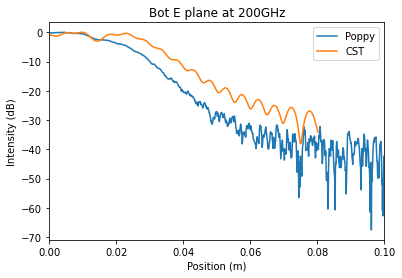

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

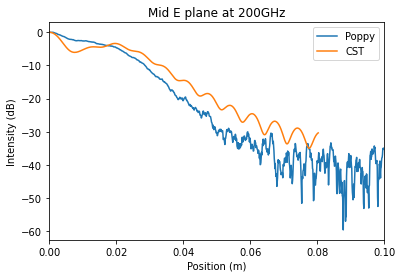

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

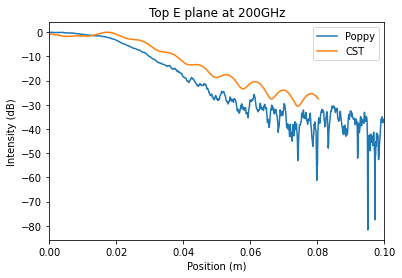

<Figure size 432x288 with 0 Axes>

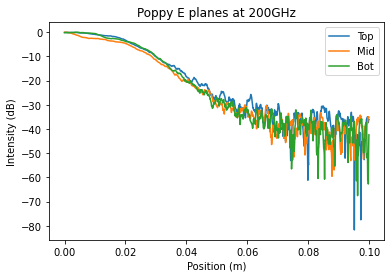

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

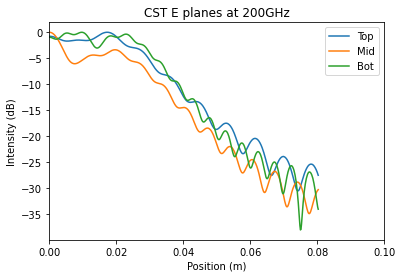

<Figure size 432x288 with 0 Axes>

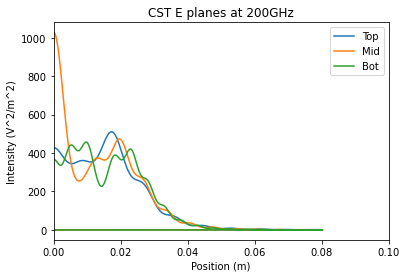

In [2]:
# From lens to tertiary in poppy @ 200GHz
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

rnum=str(4) # what run number should be plotted?
# original=4, high NFS res=5, high CST mesh res=6, all look the same

ylens=-49.840796
ybot=-27.8737
ymid=-18.8737
ytop=-9.8737
# separations 
d = [(ybot-ylens)*u.cm,(ymid-ybot)*u.cm,(ytop-ymid)*u.cm]

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 200 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]

ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=5*u.cm, wavelength=ll)
    
lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.0381*u.m)
wf *= ring # cold stop

wf.propagate_fresnel(d[0]) # propogate to bot
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
y, x = wf.coordinates()
plt.figure(1)
plt.title("Bot E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_bot=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_botx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_botx, pop_bot,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()
plt.clf()

wf.propagate_fresnel(d[1]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
plt.figure(2)
plt.title("Mid E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_mid=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_midx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_midx, pop_mid,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()
plt.clf()

wf.propagate_fresnel(d[2]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
plt.figure(3)
plt.title("Top E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_top=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_topx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_topx, pop_top,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()
plt.clf()

plt.figure(4)                    
plt.title("Poppy E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
plt.plot(pop_topx,pop_top,label='Top')
plt.plot(pop_midx,pop_mid,label='Mid')
plt.plot(pop_botx,pop_bot,label='Bot')                    
plt.legend()
plt.show()
plt.clf()
                    
plt.figure(5)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Top')
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Mid')                
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Bot')                  
plt.legend()  
plt.xlim([0,0.1])
plt.show()                    
plt.clf()


plt.figure(6)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (V^2/m^2)")
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_top.txt')
plt.plot(xpos/100,xpower,label='Top')
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_mid.txt')
plt.plot(xpos/100,xpower,label='Mid')                 
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run'+rnum+'/xbeampos_bot.txt')
plt.plot(xpos/100,xpower,label='Bot')                  
plt.legend()  
plt.xlim([0,0.1])
plt.show()  

                    

---Fitting peak amplitude of gaussians---
From the fit: w0=0.007956777504766123 m
Fit's amplitude: c=12.455168859382836 V


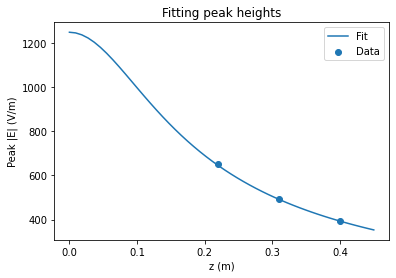

In [15]:
#fitting only gaussian amplitudes and only gaussian widths to back out w_0
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
import astropy.units as u
from astropy import constants as const
from scipy.optimize import curve_fit

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity ($V/m$)")
xpower=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')
xpos=xpos/100
plt.plot(xpos,xpower,label='Top')
guess = [0, 15, 0.02]
popt_top, pcov = curve_fit(func, xpos, xpower, p0=guess, bounds=((-0.1, 1, 0), (0.1, 2500, 1)))
#print(popt_top)
xpower=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')
xpos=xpos/100
plt.plot(xpos,xpower,label='Mid')
guess = [0, 25, 0.02]
popt_mid, pcov = curve_fit(func, xpos, xpower, p0=guess, bounds=((-0.1, 1, 0), (0.1, 3000, 1)))
#print(popt_mid)
xpower=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')
xpos=xpos/100
plt.plot(xpos,xpower,label='Bot')
guess = [0, 45, 0.02]
popt_bot, pcov = curve_fit(func, xpos, xpower, p0=guess, bounds=((-0.1, 1, 0), (0.1, 5000, 1)))
#print(popt_bot)
plt.legend()  
#plt.xlim([0,0.1])
#plt.show()  
plt.clf()

u_0=[popt_top[1], popt_mid[1], popt_bot[1]]
ylens=-49.840796/100
ybot=-27.8737/100
ymid=-18.8737/100
ytop=-9.8737/100
# separations 
z = [ytop-ylens,ymid-ylens,ybot-ylens] # in meters
ff = 200 * u.GHz
ll = const.c/ff
ll=ll.to(u.m).value # converted to m

def w0func(z, *params):
    out = np.zeros_like(z)
    ll=0.00149896229 # wavelength in m when freq=200GHz 
    w_0=params[0]
    c=params[1]
    for it in range(0, len(z)-1):
        w = w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2)
        out[it] = c*np.sqrt(2/math.pi)/w
    return out

guess=[0.1, 10]

popt, pcov = curve_fit(w0func, z, u_0, p0=guess, bounds=((0, 0), (100, 1000)))

print('---Fitting peak amplitude of gaussians---')
print(f"From the fit: w0={float(popt[0])} m")
print(f"Fit's amplitude: c={popt[1]} V")

plt.figure(1)
plt.scatter(z,u_0,label='Data')
x=np.linspace(0,0.45)#(0.20,0.45)
y=np.zeros_like(x)
for it in range(0, len(x)):
    y[it] = popt[1]*np.sqrt(2/math.pi)/(popt[0]*np.sqrt(1+(ll*x[it]/math.pi/popt[0]**2)**2))
    
plt.plot(x,y,label='Fit')
plt.legend()
plt.title("Fitting peak heights")
plt.xlabel('z (m)')
plt.ylabel('Peak |E| (V/m)')
plt.show()

#wids=[popt_bot[2], popt_mid[2], popt_top[2]] # w fits from gaussian widths
#print("")
#print("---Fitting to the width of each gaussian individually---")
#print("The roots of the polynomials are as follows:")
#for it in np.arange(0,3):
#    p=[1, 0, -wids[it]**2, ll*z[it]/math.pi]
#    print(np.roots(p)) # the first roots are the only real ones, so their abs value is w_0?

Fit w_0=3.6582519633343422e-06m, and amplitude=15.883173503149033V/m
Covariance matrix:[[1.09263894e-16 2.38244467e-10]
 [2.38244467e-10 1.53789093e-03]]


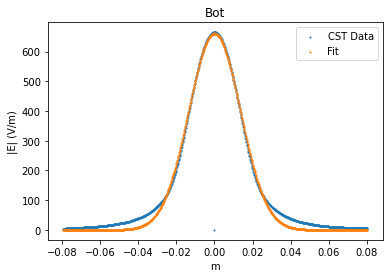

Bot Width=0.016908176759080854m
Bot Amplitude=749.5154028307361


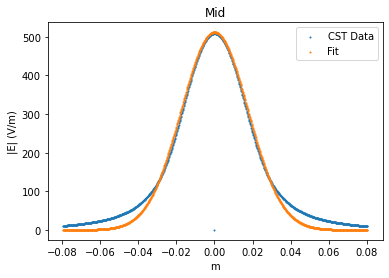

Mid Width=0.02109501698848863m
Mid Amplitude=600.7550940409903


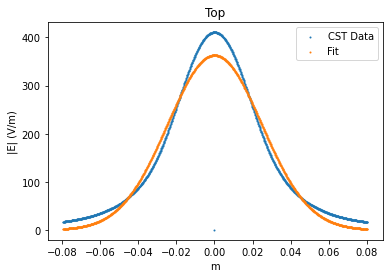

Top Width=0.02803779894865695m
Top Amplitude=451.99478525124476


<Figure size 432x288 with 0 Axes>

In [224]:
#Fitting all the data (with z set to 0)
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
from astropy import constants as const
from scipy.optimize import curve_fit

def func(x, *params):
    ll=0.00149896229 # wavelength in m when freq=200GHz 
    ylens=-49.840796/100
    ybot=-27.8737/100
    ymid=-18.8737/100
    ytop=-9.8737/100
    #z = [ybot-ylens,ymid-ylens,ytop-ylens] # in meters
    z = [ytop-ylens,ymid-ylens,ybot-ylens] #expected order flipped
    
    w_0 = params[0]     
    amp = params[1]
    
    y = np.zeros_like(x)
    for it in np.arange(0,3):
        w=1/(w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2))
        y[995*it:995*(it+1)]=amp*np.sqrt(2/math.pi)/abs(w)*np.exp(-(x[995*it:995*(it+1)]/w)**2)
    return y

x=np.zeros(995*3)
E=np.zeros(995*3)

E[0:995*1]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt'))
x[0:995*1]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')/100

E[995*1:995*2]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt'))
x[995*1:995*2]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')/100

E[995*2:995*3]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt'))
x[995*2:995*3]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')/100

guess=[0.01, 15]

popt, pcov = curve_fit(func, x, E, p0=guess, bounds=((0, 0), (1, 100)))

ll=0.14989622900000002/100 # wavelength in m when freq=200GHz 
ylens=-49.840796/100
ybot=-27.8737/100
ymid=-18.8737/100
ytop=-9.8737/100
z = [ytop-ylens,ymid-ylens,ybot-ylens] # expected order flipped
  
w_0 = popt[0]     
amp = popt[1]
w=1/(w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2))

print(f"Fit w_0={popt[0]}m, and amplitude={popt[1]}V/m")
print(f"Covariance matrix:{pcov}")
t=["Bot", "Mid", "Top"]
y=func(x,popt[0], popt[1])
for it in np.arange(0,3):
    plt.scatter(x[995*it:995*(it+1)], E[995*it:995*(it+1)], 1, label="CST Data")
    plt.scatter(x[995*it:995*(it+1)], y[995*it:995*(it+1)], 1, label="Fit")
    plt.title(t[it])
    plt.xlabel('m')
    plt.ylabel('|E| (V/m)')
    plt.legend()
    plt.savefig(t[it]+"_Fit.png")
    plt.show()
    plt.clf()
    w=1/(w_0*np.sqrt(1+(ll*(z[it]-dz)/math.pi/w_0**2)**2))
    print(f"{t[it]} Width={w}m")
    print(f"{t[it]} Amplitude={amp*np.sqrt(2/math.pi)/w}")
    

(With waist position fixed)

|Name|Width(m)|Peak Amplitude(V/m)|
|----|--------|-------------------|
|NFS | 5.8E-2 | 20                |
|Bot | 1.7E-2 | 750               |
|Mid | 2.1E-2 | 601               |
|Top | 2.8E-2 | 452               |


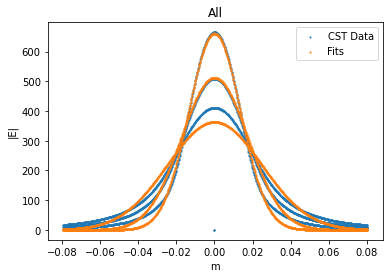

In [174]:
plt.scatter(x, E, 1, label="CST Data")
plt.scatter(x, y, 1, label="Fits")
plt.title("All")
plt.xlabel('m')
plt.ylabel('|E| (V/m)')
plt.legend()
plt.show()

Fit w_0=4.2882161400507495e-06m, amplitude=15.88132544538518V/m, and dz=-0.05378592512993903m
[[ 2.25638661e-15  2.69247450e-10 -1.78889977e-10]
 [ 2.69247450e-10  1.42415811e-03 -9.16339256e-07]
 [-1.78889977e-10 -9.16339256e-07  1.51131841e-05]]


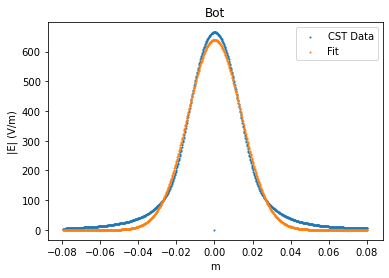

Bot Width=0.019819825753892382m
Bot Amplitude=639.3327840165294


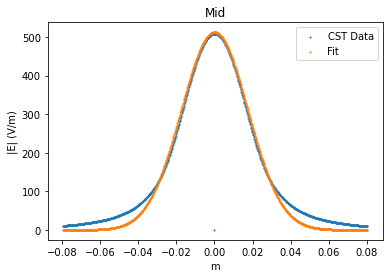

Mid Width=0.02472765496508639m
Mid Amplitude=512.4410056614624


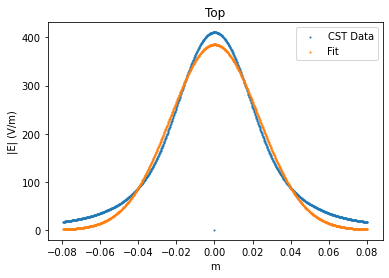

Top Width=0.03286600900872382m
Top Amplitude=385.5492273063962


<Figure size 432x288 with 0 Axes>

In [218]:
#Fitting all the data (with z free)
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
from astropy import constants as const
from scipy.optimize import curve_fit

def func(x, *params):
    ll=0.14989622900000002/100 # wavelength in m when freq=200GHz 
    ylens=-49.840796/100
    ybot=-27.8737/100
    ymid=-18.8737/100
    ytop=-9.8737/100
    #z = [ybot-ylens,ymid-ylens,ytop-ylens] # in meters
    z = [ytop-ylens,ymid-ylens,ybot-ylens] #lets flip the order as a test
    
    w_0 = params[0]     
    amp = params[1]
    dz = params[2]
    
    y = np.zeros_like(x)
    for it in np.arange(0,3):
        w=1/(w_0*np.sqrt(1+(ll*(z[it]-dz)/math.pi/w_0**2)**2))
        y[995*it:995*(it+1)]=amp*np.sqrt(2/math.pi)/w*np.exp(-(x[995*it:995*(it+1)]/w)**2)
    return y

x=np.zeros(995*3)
E=np.zeros(995*3)

E[0:995*1]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt'))
x[0:995*1]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')/100

E[995*1:995*2]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt'))
x[995*1:995*2]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')/100

E[995*2:995*3]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt'))
x[995*2:995*3]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')/100

guess=[0.01, 15, 0]

popt, pcov = curve_fit(func, x, E, p0=guess, bounds=((0, 0, -1), (1, 100, 1)))

ll=0.00149896229 # wavelength in m when freq=200GHz 
ylens=-49.840796/100
ybot=-27.8737/100
ymid=-18.8737/100
ytop=-9.8737/100
z = [ytop-ylens,ymid-ylens,ybot-ylens] #lets flip the order as a test
  
w_0 = popt[0]     
amp = popt[1]
dz = popt[2]
w=1/(w_0*np.sqrt(1+(ll*(z[it]-dz)/math.pi/w_0**2)**2))

print(f"Fit w_0={popt[0]}m, amplitude={popt[1]}V/m, and dz={popt[2]}m")
print(pcov)
t=["Bot", "Mid", "Top"]
y=func(x,popt[0], popt[1], popt[2])
for it in np.arange(0,3):
    plt.scatter(x[995*it:995*(it+1)], E[995*it:995*(it+1)], 1, label="CST Data")
    plt.scatter(x[995*it:995*(it+1)], y[995*it:995*(it+1)], 1, label="Fit")
    plt.title(t[it])
    plt.xlabel('m')
    plt.ylabel('|E| (V/m)')
    plt.legend()
    #plt.savefig(t[it]+"_Fit.png")
    plt.show()
    plt.clf()
    w=1/(w_0*np.sqrt(1+(ll*(z[it]-dz)/math.pi/w_0**2)**2))
    print(f"{t[it]} Width={w}m")
    print(f"{t[it]} Amplitude={amp*np.sqrt(2/math.pi)/w}")
    

(With waist position free)

|Name|Width(m)|Peak Amplitude(V/m)|
|----|--------|-------------------|
|NFS | 5.8E-2 | 20                |
|Bot | 2.0E-2 | 639               |
|Mid | 2.5E-2 | 512               |
|Top | 3.3E-2 | 386               |


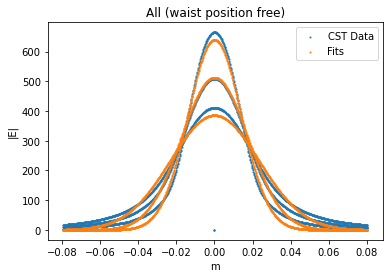

In [203]:
plt.scatter(x, E, 1, label="CST Data")
plt.scatter(x, y, 1, label="Fits")
plt.title("All (waist position free)")
plt.xlabel('m')
plt.ylabel('|E|')
plt.legend()
plt.show()

w_0=0.026195985619889284m


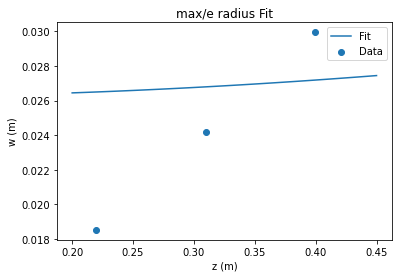

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [24]:
#fitting to radius of max/e |E| to back out w_0
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
import astropy.units as u
from astropy import constants as const
from scipy.optimize import curve_fit
from scipy.optimize import minimize

r=[0, 0, 0]

Etop=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt'))
xtop=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')/100
htop=max(Etop)/np.exp(1)
idxtop=(np.abs(Etop-htop)).argmin()
r[0]=xtop[idxtop]

Emid=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt'))
xmid=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')/100
hmid=max(Emid)/np.exp(1)
idxmid=(np.abs(Emid-hmid)).argmin()
r[1]=xmid[idxmid]

Ebot=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt'))
xbot=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')/100
hbot=max(Ebot)/np.exp(1)
idxbot=(np.abs(Ebot-hbot)).argmin()
r[2]=xbot[idxbot]
 
#print(r)    
    
ylens=-49.840796/100
ybot=-27.8737/100
ymid=-18.8737/100
ytop=-9.8737/100
z = [ytop-ylens,ymid-ylens,ybot-ylens] # in meters

def w0_fit(z, params):
    w = np.zeros_like(z)
    ff = 200 * u.GHz
    ll = const.c/ff
    ll=ll.to(u.m).value # converted to m
    w_0=params
    
    for it in range(0, len(z)-1):
        w[it] = w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2)
        
    return w

guess=[0.05]

w_0, pcov = curve_fit(w0_fit, z, r, p0=guess, bounds=((0), (1)))
print(f"w_0={float(w_0)}m")

#visualize goodness of fit:
plt.scatter(z,r,label="Data")
x=np.linspace(0.20,0.45)
y=np.zeros_like(x)
for it in range(0, len(x)):
    y[it] = w_0*np.sqrt(1+(ll*x[it]/math.pi/w_0**2)**2)

plt.plot(x,y,label='Fit')
plt.xlabel('z (m)')
plt.ylabel('w (m)')
plt.title('max/e radius Fit')
plt.legend()
plt.show()
   
#that doesn't seem to work (it looks okay if you fit to power for some reason),
#so I'll try the equivalent thing with scipy's minimize as a sanity check...

def w0_zerod(params):
    w = 0
    ff = 200 * u.GHz
    ll = const.c/ff
    ll=ll.to(u.m).value # converted to m
    
    ylens=-49.840796/100
    ybot=-27.8737/100
    ymid=-18.8737/100
    ytop=-9.8737/100
    z = [ytop-ylens,ymid-ylens,ybot-ylens] # in meters
    r=[0.029952999999999997, 0.02416, 0.018527000000000002]

    w_0=params
    
    for it in range(0, len(z)-1):
        w = w +  (w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2)-r[it])^2
        
    return w

guess=0.05
res = minimize(w0_zerod, guess, method='nelder-mead')
print(res.x)

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykern

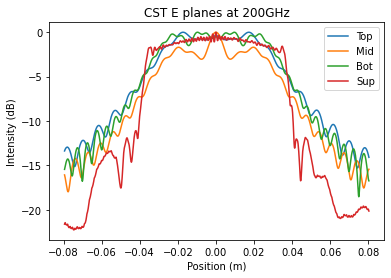

---Fitting peak amplitude of gaussians---
From the fit: w0=0.15534786400371997 m
Fit's amplitude: c=4.328642872703577 V


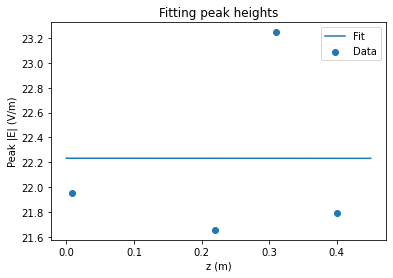

Order: Top, Mid, Bot, Sup
Amplitudes: [21.793265006299123, 23.247506092815737, 21.65513668252385, 21.95368780176744]
Widths: [0.03831271137030784, 0.03672723544890339, 0.038279531052606876, 0.03674492570542705]


In [31]:
#fitting gaussian amplitudes from TO.cst run3 to back out w_0
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
import astropy.units as u
from astropy import constants as const
from scipy.optimize import curve_fit

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
xpower_top=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeam_top.txt'))
xpos_top=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeampos_top.txt')
xpos_top=xpos_top/100
temp=max(10*np.log10(xpower_top))
plt.plot(xpos_top,10*np.log10(xpower_top)-temp,label='Top')
guess = [0, 5, 0.02]
popt_top, pcov = curve_fit(func, xpos_top, xpower_top, p0=guess, bounds=((-0.1, 1, 0), (0.1, 2500, 1)))
#print(popt_top)
xpower_mid=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeam_mid.txt'))
xpos_mid=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeampos_mid.txt')
xpos_mid=xpos_mid/100
temp=max(10*np.log10(xpower_mid))
plt.plot(xpos_mid,10*np.log10(xpower_mid)-temp,label='Mid')
guess = [0, 5, 0.02]
popt_mid, pcov = curve_fit(func, xpos_mid, xpower_mid, p0=guess, bounds=((-0.1, 1, 0), (0.1, 3000, 1)))
#print(popt_mid)
xpower_bot=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeam_bot.txt'))
xpos_bot=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeampos_bot.txt')
xpos_bot=xpos_bot/100
temp=max(10*np.log10(xpower_bot))
plt.plot(xpos_bot,10*np.log10(xpower_bot)-temp,label='Bot')
guess = [0, 5, 0.02]
popt_bot, pcov = curve_fit(func, xpos_bot, xpower_bot, p0=guess, bounds=((-0.1, 1, 0), (0.1, 5000, 1)))
#print(popt_bot)
xpower_sup=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeam_sup.txt'))
xpos_sup=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run4/xbeampos_sup.txt')
xpos_sup=xpos_sup/100
temp=max(10*np.log10(xpower_sup))
plt.plot(xpos_sup,10*np.log10(xpower_sup)-temp,label='Sup')
guess = [0, 5, 0.02]
popt_sup, pcov = curve_fit(func, xpos_sup, xpower_sup, p0=guess, bounds=((-0.1, 1, 0), (0.1, 5000, 1)))
#print(popt_sup)
plt.legend()  
#plt.xlim([0,0.1])
plt.show()  
plt.clf()

u_0=[popt_top[1], popt_mid[1], popt_bot[1], popt_sup[1]]
ylens=-49.840796/100
ybot=-27.8737/100
ymid=-18.8737/100
ytop=-9.8737/100
# separations 
z = [ytop-ylens,ymid-ylens,ybot-ylens, 0.0085] # in meters
ff = 200 * u.GHz
ll = const.c/ff
ll=ll.to(u.m).value # converted to m

def w0func(z, *params):
    out = np.zeros_like(z)
    ll=0.00149896229 # wavelength in m for freq=200GHz 
    w_0=params[0]
    c=params[1]
    dz=0#params[2] # need to edit guess and bounds when toggling
    for it in range(0, len(z)-1):
        w = w_0*np.sqrt(1+(ll*(z[it]-dz)/math.pi/w_0**2)**2)
        out[it] = c*np.sqrt(2/math.pi)/w
    return out

guess=[0.15, 4.4]

popt, pcov = curve_fit(w0func, z, u_0, p0=guess, bounds=((0, 0), (0.5, 20)))

print('---Fitting peak amplitude of gaussians---')
print(f"From the fit: w0={float(popt[0])} m")
print(f"Fit's amplitude: c={popt[1]} V")
#print(f"Shift of waist from NFS: dz={popt[2]} m")

plt.figure(1)
plt.scatter(z,u_0,label='Data')
x=np.linspace(0,0.45)#(0.20,0.45)
y=np.zeros_like(x)
for it in range(0, len(x)):
    y[it] = popt[1]*np.sqrt(2/math.pi)/(popt[0]*np.sqrt(1+(ll*x[it]/math.pi/popt[0]**2)**2))
    
plt.plot(x,y,label='Fit')
plt.legend()
plt.title("Fitting peak heights")
plt.xlabel('z (m)')
plt.ylabel('Peak |E| (V/m)')
plt.show()

print("Order: Top, Mid, Bot, Sup")
print(f"Amplitudes: {u_0}")
print(f"Widths: {[popt_top[2], popt_mid[2], popt_bot[2], popt_sup[2]]}")

Sup = supremum of NFS; it is 8.5mm above the NFS

|Name|Width(m)|Peak Amplitude(V/m)|
|----|--------|-------------------|
|NFS | 5.8E-2 | 20                |
|Sup | 5.1E-3 | 13                |
|Bot | 1.9E-2 | 3.4               |
|Mid | 2.6E-2 | 2.6               |
|Top | 3.2E-2 | 2.1               |
